In [49]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

## FUNCTIONS 

In [50]:
def keep_numeric(x):
    return re.sub("[^0-9]", "", x)

In [51]:
def replace_price(x):
    if x == "£":
        return 1
    if x == "££": 
        return 2 
    if x == "£££": 
        return 3 
    if x == "££££": 
        return 4 

In [52]:
#function Long_lat 
def transform_lat(x):
    try:
        geolocator = Nominatim(user_agent="aaaa")
        location = geolocator.geocode(x)
        return (location.latitude)
    except: AttributeError
    pass


def transform_lon(x):
    try:
        geolocator = Nominatim(user_agent="aaaa")
        location = geolocator.geocode(x)
        return (location.longitude)
    except: AttributeError
    pass

In [53]:
def get_postal_code(x):
    return re.findall(r'\d{4}-\d{3}', x)

In [54]:
#Function labels 
def labels_eat_on_site (x):
    if 'dine-in' in x:
        return 1 
    else: 
        return 0
    
def labels_delivery (x):
    if ('delivery' in x) or ('no-contact delivery' in x):
        return 1
    else: 
        return 0
    
def labels_takeaway (x):
    if ('takeaway' in x):
        return 1
    else: 
        return 0

def labels_drive_thru (x):
    if ('drive-through' in x):
        return 1
    else: 
        return 0
    
def labels_no_del(x):
    if ( 'no delivery' in (x)):
        return 1
    else: 
        return 0    

## Preprocessing of columns

In [55]:
# Importing the data, and basic preprocessing 
data= pd.read_csv("../raw_data/restaurants2 - Copy.csv", header= None)
data=data.rename(columns={0:"Index", 1:"name" , 2:"type", 3:"description", 4:"rating", 5:"review_count", 6: "price", 7:"address", 8:"label"})
data=data.drop(columns='Index') # Check whether to keep it or not 

In [56]:
# Column rating 
data.rating=pd.to_numeric(data.rating, downcast="float")

# Column review_count 
data.review_count=data.review_count.map(keep_numeric)
data.review_count=pd.to_numeric(data.review_count, downcast="float")

#Column price 
data.price = data.price.map(replace_price)

#Adress into latitude and longitude 
data['latitude']=data.address.map(transform_lat)
data['longitude']=data.address.map(transform_lon) # have to do something for all the na 

data.label= data['label'].str.lower()

# handling the label 
data.label= data['label'].str.lower()
data['dine_in']=data.label.map(labels_eat_on_site)
data['takeaway']=data.label.map(labels_takeaway)
data['delivery']=data.label.map(labels_delivery)
data['drive_through']=data.label.map(labels_drive_thru)
data['no_del_exp']=data.label.map(labels_no_del)

# handling the type
data.type= data.type.str.lower()
data.type=data.type.replace('restaurant', '', regex=True)

#add postal code
#data['postal_code']=data.address.map(get_postal_code)

In [57]:
data.head()

,name,type,description,rating,review_count,price,address,label,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",None,None,1,1,1,0,1
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",None,None,1,1,1,0,0
2,Crisfama,,NaN,4.8,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",None,None,1,1,1,0,1
3,Alma,fine dining,High-end restaurant with avant-garde local mea...,4.8,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",None,None,1,1,1,0,1
4,Restaurant CHULHO & Bar,,NaN,4.9,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",None,None,1,1,1,0,0


In [58]:
data.type.value_counts()

                11
brunch           2
fine dining      1
seafood          1
portuguese       1
peruvian         1
basque           1
bistro           1
tapas            1
european         1
Name: type, dtype: int64

In [59]:
data.head()

,name,type,description,rating,review_count,price,address,label,latitude,longitude,dine_in,takeaway,delivery,drive_through,no_del_exp
0,Augusto Lisboa,brunch,"Hip brunch eatery serving savory toasts, banan...",4.8,1032.0,2.0,"Rua Santa M.nha 26, 1100-491 Lisboa, Portugal","['dine-in', 'takeaway', 'no delivery']",None,None,1,1,1,0,1
1,Tiffin Cafe & Restaurant Lisboa,brunch,NaN,4.9,139.0,2.0,"R. do Conde 32, 1200-637 Lisboa, Portugal","['dine-in', 'takeaway', 'delivery']",None,None,1,1,1,0,0
2,Crisfama,,NaN,4.8,649.0,1.0,"Rua da Cruz de Santa Apolónia 56, 1100-188 Lis...","['dine-in', 'takeaway', 'no delivery']",None,None,1,1,1,0,1
3,Alma,fine dining,High-end restaurant with avant-garde local mea...,4.8,953.0,4.0,"R. Anchieta 15, 1200-224 Lisboa, Portugal","['dine-in', 'no takeaway', 'no delivery']",None,None,1,1,1,0,1
4,Restaurant CHULHO & Bar,,NaN,4.9,180.0,NaN,"R. de São João da Mata 82, 1200-850 Lisboa, Po...","['dine-in', 'takeaway', 'delivery']",None,None,1,1,1,0,0


## Exploration

(array([2., 0., 2., 0., 3., 0., 0., 0., 9., 5.]),
 array([4.4      , 4.4500003, 4.5      , 4.55     , 4.6      , 4.65     ,
        4.7000003, 4.75     , 4.8      , 4.85     , 4.9      ],
       dtype=float32),
 <BarContainer object of 10 artists>)

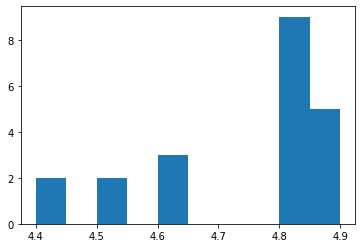

In [60]:
# Repartition of reviews
plt.hist(data.rating)

average number of reviews per store: 1135.9048
Some outliers with many reviews: 


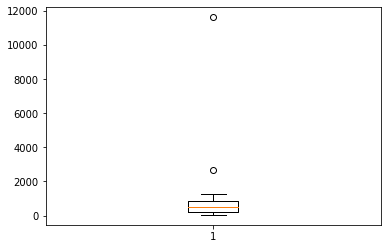

In [61]:
# number of reviews per store: 
plt.boxplot(data.review_count)

print('average number of reviews per store:', data.review_count.mean())
print('Some outliers with many reviews: ')

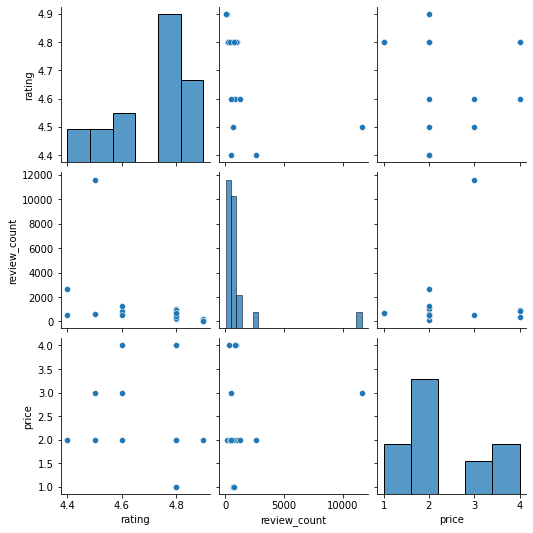

In [62]:
sns.pairplot(data[['rating', 'review_count', 'price']])

### Relationship between number of reviews and review score: 


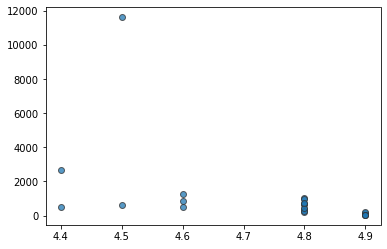

In [63]:
plt.scatter(data.rating, data.review_count,  edgecolor='#333333', alpha=0.75)

## Labels

In [64]:
data.label.value_counts()

['dine-in', 'takeaway', 'no delivery']                 5
['dine-in', 'no delivery']                             5
['dine-in', 'takeaway', 'delivery']                    4
['dine-in', 'no takeaway', 'no delivery']              3
['dine-in', 'drive-through', 'no-contact delivery']    1
['dine-in', 'takeaway', 'no-contact delivery']         1
['dine-in', 'takeaway']                                1
['dine-in']                                            1
Name: label, dtype: int64

In [65]:
data.groupby('label').mean()
#regions = countries_df.groupby('Region')

,rating,review_count,price,dine_in,takeaway,delivery,drive_through,no_del_exp
label,,,,,,,,
"['dine-in', 'drive-through', 'no-contact delivery']",4.500000,11612.000000,3.000000,1.0,0.0,1.0,1.0,0.0
"['dine-in', 'no delivery']",4.740000,414.799988,2.250000,1.0,0.0,1.0,0.0,1.0
"['dine-in', 'no takeaway', 'no delivery']",4.633333,821.333313,3.333333,1.0,1.0,1.0,0.0,1.0
"['dine-in', 'takeaway', 'delivery']",4.775000,757.500000,2.000000,1.0,1.0,1.0,0.0,0.0
"['dine-in', 'takeaway', 'no delivery']",4.760000,617.000000,1.750000,1.0,1.0,1.0,0.0,1.0
"['dine-in', 'takeaway', 'no-contact delivery']",4.600000,1256.000000,2.000000,1.0,1.0,1.0,0.0,0.0
"['dine-in', 'takeaway']",4.800000,287.000000,NaN,1.0,1.0,0.0,0.0,0.0
['dine-in'],4.900000,46.000000,NaN,1.0,0.0,0.0,0.0,0.0


In [66]:
data.groupby('no_delivery').mean()
#regions = countries_df.groupby('Region')

KeyError: 'no_delivery'

## Mapping of coordinates of restaurant with folium 

In [ ]:
import os 
import folium

In [ ]:
data_2=data.dropna()

latlonname= zip(data_2['latitude'],data_2['longitude'], data_2['name'], data_2['price'], data_2['rating'])

m = folium.Map(location=[38.7166,  -9.1483], titles='small businesses', zoom_start=14)

for coord in latlonname:
    folium.Marker(location=[coord[0], coord[1]], popup= (coord[2:5]), fill_color='#43d9de', radius=8 ).add_to(m)
    
m

In [ ]:
codigos[codigos['cod_concelho']==11]

In [ ]:
data.head()

# Regression

## imports

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor

In [71]:
X = data[['review_count', 'takeaway', 'delivery', 'drive_through', 'no_del_exp']] #price
y =data['rating']

In [72]:
#enc = OneHotEncoder(handle_unknown='ignore') encode type and price

In [73]:
#enc(data.type)

## Linear Regression

In [74]:
model = LinearRegression()


In [75]:
data.corr()

,rating,review_count,price,dine_in,takeaway,delivery,drive_through,no_del_exp
rating,1.000000e+00,-0.450945,-0.109142,NaN,-9.807227e-08,-0.240641,-0.312189,-0.042782
review_count,-4.509454e-01,1.000000,0.162065,NaN,-2.422337e-01,0.130471,0.971749,-0.290590
price,-1.091416e-01,0.162065,1.000000,NaN,-4.662524e-02,NaN,0.176227,0.049703
dine_in,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
takeaway,-9.807227e-08,-0.242234,-0.046625,NaN,1.000000e+00,0.114708,-0.316228,-0.138675
delivery,-2.406410e-01,0.130471,NaN,NaN,1.147079e-01,1.000000,0.072548,0.413585
drive_through,-3.121890e-01,0.971749,0.176227,NaN,-3.162278e-01,0.072548,1.000000,-0.285044
no_del_exp,-4.278232e-02,-0.290590,0.049703,NaN,-1.386750e-01,0.413585,-0.285044,1.000000


<AxesSubplot:xlabel='review_count', ylabel='rating'>

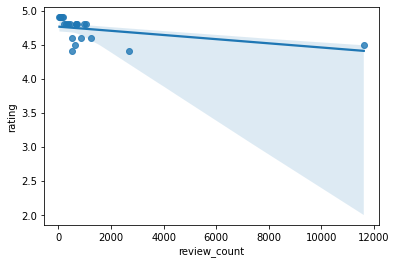

In [76]:
sns.regplot(x='review_count', y='rating', data=data)

In [78]:
model = sm.OLS(y, X).fit() # Finds the best beta
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.911
Model:                            OLS   Adj. R-squared (uncentered):              0.883
Method:                 Least Squares   F-statistic:                              32.66
Date:                Tue, 30 Nov 2021   Prob (F-statistic):                    7.51e-08
Time:                        16:30:20   Log-Likelihood:                         -37.063
No. Observations:                  21   AIC:                                      84.13
Df Residuals:                      16   BIC:                                      89.35
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
review_count     -0.0001      0.001     -0.215      0.833      -0.002       0.001
takeaway          1.1971      0.824      1.453      0.166      -0.549       2.943
delivery          3.6665      1.148      3.195      0.006       1.234       6.099
drive_through     2.5076      7.655      0.328      0.747     -13.720      18.736
no_del_exp        0.4045      0.913      0.443      0.664      -1.531       2.339
==============================================================================
Omnibus:                       25.117   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.727
Skew:                           2.293   Prob(JB):                     1.75e-08
Kurtosis:                       7.450   Cond. No.                     5.78e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3, 
                                                    random_state = 6) # Holdout


baseline_model = DummyRegressor(strategy="mean") # Baseline
baseline_model.fit(X_train, y_train) # Calculate value for stratgy
baseline_model.score(X_test, y_test) # Score model based on consistently predicting the strategy

-0.22499899503976106

In [82]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
#import math
#def metrics(y, y_pred):
    #mse = mean_squared_error(y, y_pred)

    #rmse = math.sqrt(mse)

    #mae = mean_absolute_error(y, y_pred)

    #rsquared = r2_score(y, y_pred)

    #max_error = max_error(y, y_pred)

    #print('MSE =', round(mse, 2))
    #print('RMSE =', round(rmse, 2))
    #print('MAE =', round(mae, 2))
    #print('R2 =', round(rsquared, 2))
    #print('Max Error =', round(max_error, 2))

NameError: name 'y_pred' is not defined

In [129]:
from sklearn.model_selection import cross_validate
# 5-Fold Cross validate model
model = LinearRegression()
cv_results = cross_validate(model, X, y, cv=5, 
                            scoring=['max_error',
                                     'r2', 
                                     'neg_mean_absolute_error',
                                     'neg_mean_squared_error']
                           )
#pd.DataFrame(cv_results)
cv_results

{'fit_time': array([0.0074141 , 0.00862503, 0.00297785, 0.00517797, 0.00784588]),
 'score_time': array([0.00480628, 0.00255489, 0.007195  , 0.01474309, 0.00732422]),
 'test_max_error': array([-0.23132395, -1.76612403, -0.52268053, -0.18162981, -0.39802577]),
 'test_r2': array([ -9.46048087, -45.44857449,  -1.25672651,   0.        ,
         -1.03818473]),
 'test_neg_mean_absolute_error': array([-0.13260695, -0.49529816, -0.25649613, -0.11304939, -0.23749518]),
 'test_neg_mean_squared_error': array([-0.02510511, -0.78382098, -0.10155272, -0.01705144, -0.07133648])}

## SGD Regressor

In [84]:
from sklearn.linear_model import SGDRegressor

In [136]:
lin_reg = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.0001, l1_ratio=0.15,
    max_iter = 1000, random_state= 42) #learning_rate=1)#, learning_rate=00.1, eta0=0.01)

In [137]:
lin_reg.fit(X_train, y_train)

/Users/malou/.pyenv/versions/3.8.12/envs/small_business/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:165: FutureWarning: The loss 'squared_loss' was deprecated in v1.0 and will be removed in version 1.2. Use `loss='squared_error'` which is equivalent.
  warnings.warn(


SGDRegressor(loss='squared_loss', random_state=42)

## KNN Regressor

In [99]:
from sklearn.neighbors import KNeighborsRegressor


In [102]:
knn_reg = KNeighborsRegressor(n_neighbors=5)

In [103]:
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

## Ridge and Lasso

In [120]:
from sklearn.linear_model import Ridge, Lasso 

linreg = LinearRegression().fit(X, y)
ridge = Ridge(alpha=0.2).fit(X, y)
lasso = Lasso(alpha=0.2).fit(X, y)

coefs = pd.DataFrame({
    "coef_linreg": pd.Series(linreg.coef_, index = X.columns),
    "coef_ridge": pd.Series(ridge.coef_, index = X.columns),
    "coef_lasso": pd.Series(lasso.coef_, index= X.columns)})\

coefs\
    .applymap(lambda x: int(x))\
    .style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')


,coef_linreg,coef_ridge,coef_lasso
review_count,0,0,0
takeaway,0,0,0
delivery,0,0,0
drive_through,1,0,0
no_del_exp,0,0,0


In [106]:
#finetune 
alphas = [0.01, 0.1, 1] # L1 + L2 
l1_ratios = [0.2, 0.5, 0.8] # L1 / L2 ratio

# create all combinations [(0.01, 0.2), (0.01, 0.5), (...)]
import itertools
hyperparams = itertools.product(alphas, l1_ratios) 

In [108]:
import itertools
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

for hyperparam in hyperparams:
    alpha = hyperparam[0]
    l1_ratio = hyperparam[1]
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    r2 = cross_val_score( X_train, y_train, cv=5).mean()
    print(f"alpha: {alpha}, l1_ratio: {l1_ratio},   r2: {r2}")

alpha: 0.01, l1_ratio: 0.2,   r2: -0.34652147233822717
alpha: 0.01, l1_ratio: 0.5,   r2: -0.033761378515447846
alpha: 0.01, l1_ratio: 0.8,   r2: 0.03874543156796857
alpha: 0.1, l1_ratio: 0.2,   r2: -0.12648026289254338
alpha: 0.1, l1_ratio: 0.5,   r2: -0.11238126481610963
alpha: 0.1, l1_ratio: 0.8,   r2: -0.11265967907528371
alpha: 1, l1_ratio: 0.2,   r2: -0.1137829628449238
alpha: 1, l1_ratio: 0.5,   r2: -0.11664610903257108
alpha: 1, l1_ratio: 0.8,   r2: -0.11959237369491664


### Gridsearch 

In [110]:
from sklearn.model_selection import GridSearchCV

# Instanciate model
model = ElasticNet()

# Hyperparameter Grid
grid = {'alpha': [0.01, 0.1, 1], 
        'l1_ratio': [0.2, 0.5, 0.8]}

# Instanciate Grid Search
search = GridSearchCV(model, grid, 
                           scoring = 'r2',
                           cv = 5,
                           n_jobs=-1 # paralellize computation
                          ) 

# Fit data to Grid Search
search.fit(X_train,y_train);

In [111]:
# Best score
search.best_score_

# Best Params
search.best_params_

# Best estimator
search.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0.8)

## SVM

In [113]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=10)
#grid search Kernel 

# equivalent but with SGD solver
from sklearn.linear_model import SGDClassifier
svc_bis = SGDClassifier(loss='hinge', penalty='l2', alpha=1/10)

## Decision Tree

In [116]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

tree = DecisionTreeRegressor()

cv_results = cross_validate(tree, X_train, y_train, scoring = "r2", cv=5)


## RandomForest

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)

cv_results = cross_validate(forest, X_train, y_train, scoring = "r2", cv=5)


## Boosting

### AdaBoost

In [122]:
from sklearn.ensemble import AdaBoostRegressor

adaboost = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=3),
    n_estimators=50)

cv_results = cross_validate(adaboost, X, y, scoring = "r2", cv=5)

### Gradient Boost

In [123]:
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1,
    max_depth=3
)

In [124]:
### XGBoost

In [127]:
from sklearn.xgboost import XGBRegressor

xgb_reg = XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.1)
xgb_reg.fit(X_train, y_train,
    # evaluate loss at each iteration
    eval_set=[(X_train, y_train), (X_val, y_val)],  
    # stop iterating when eval loss increases 5 times in a row
    early_stopping_rounds=5
)

y_pred = xgb_reg.predict(X_val)

ModuleNotFoundError: No module named 'sklearn.xgboost'